# __Exploratory Data Analysis__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. Roaming_data
|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
|return|귀국일|로밍 여행자가 한국에 귀국한 날짜|20200131|
|iso |국가코드|2자리 국가코드|us|
|arrival |입국일|iso 국가에 도착한 날짜|20200125|
|departure|출국일|iso 국가에서 떠난 날짜|20200127|
|count|고객수|return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수|3|


[국가코드 표](http://img.echosting.cafe24.com/guide/country_code_table.pdf)

In [2]:
# 로밍데이터
roam1 = pd.read_csv('./data/corona_contest_data_0406/2. Roaming_data.csv')
roam2 = pd.read_csv('./data/corona_contest_data_0429/2. Roaming_data.csv')

In [3]:
roam = pd.concat([roam1, roam2])
roam.head()

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [4]:
roam.head(5)

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [5]:
roam.describe().T

,count,mean,std,min,25%,50%,75%,max
return,217805.0,2.019779e+07,3972.265459,20191201.0,20191230.0,20200123.0,20200215.0,20200428.0
arrival,217805.0,2.019687e+07,4331.008571,20191031.0,20191220.0,20200113.0,20200206.0,20200428.0
departure,217805.0,2.019721e+07,4224.989743,20191031.0,20191224.0,20200117.0,20200209.0,20200428.0
count,217805.0,9.054843e+00,31.457658,3.0,3.0,3.0,5.0,1687.0


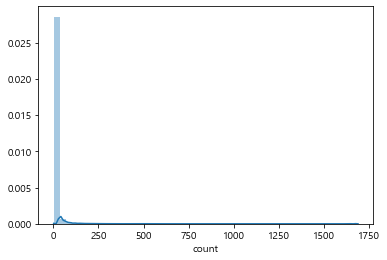

In [6]:
sns.distplot(roam['count'])

return          0
iso          3062
arrival         0
departure       0
count           0
dtype: int64


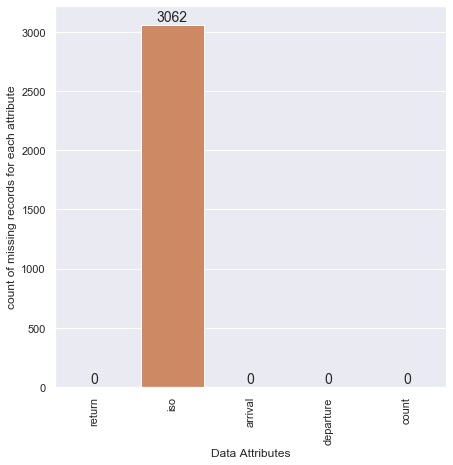

In [7]:
# 전체 결측치 확인
x = roam.columns
y = roam.isnull().sum()
print(y)
plt.figure(figsize=(7,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

## 결측치 탐색

- 국가 컬럼인 iso에서만 2972개의 결측치가 발견되었다.

In [8]:
# 국가 총 갯수

print('국가 코드 값\n', roam['iso'].unique(), end='\n')
print('')
print('총 갯수 : ', len(roam['iso'].unique()))

국가 코드 값
 ['ad' 'ae' 'af' 'am' 'ao' 'ar' 'at' 'au' 'az' 'ba' 'bd' 'be' 'bg' 'bh'
 'bn' 'bo' 'br' 'bw' 'by' 'ca' 'ch' 'cl' 'cn' 'co' 'cy' 'cz' 'de' 'dk'
 'dz' 'ec' 'ee' 'eg' 'es' 'et' 'fi' 'fj' 'fr' 'ga' 'gb' 'ge' 'gh' 'gr'
 'gu' 'hk' 'hr' 'ht' 'hu' 'id' 'ie' 'il' 'in' 'iq' 'ir' 'it' 'jm' 'jo'
 'jp' 'ke' 'kg' 'kh' 'kw' 'kz' 'la' 'lk' 'ls' 'lt' 'lu' 'lv' 'ma' 'mc'
 'me' 'mk' 'mm' 'mn' 'mo' 'mp' 'mt' 'mu' 'mv' 'mx' 'my' 'mz' nan 'na' 'ng'
 'ni' 'nl' 'no' 'np' 'nz' 'om' 'pa' 'pe' 'pg' 'ph' 'pk' 'pl' 'ps' 'pt'
 'py' 'qa' 'ro' 'rs' 'ru' 'rw' 'sa' 'sc' 'sd' 'se' 'sg' 'si' 'sk' 'sr'
 'sv' 'th' 'tm' 'tr' 'tw' 'tz' 'ug' 'us' 'uy' 'uz' 'vn' 'za' 'zm' 'zw'
 'al' 'bz' 'cr' 'gt' 'hn' 'is' 'lb' 'md' 'tk' 'ua' 'li' 'mg' 'an' 'do'
 'pr' 'to' 'tt' 'cm' 'pf' 'tg' 'tn' 'vu' 'bj' 'bt' 'cd' 'ci' 'tl' 'tp'
 'gn' 'lr' 'mr' 'mw' 'ky' 'td' 'cf' 'ne' 're' 'tc' 'ml' 'ly' 'sl' 'bf'
 'gq' 'cv' 'gm' 'ye' 'ws']

총 갯수 :  174


Text(0.5, 1.0, 'Top 30 Country')

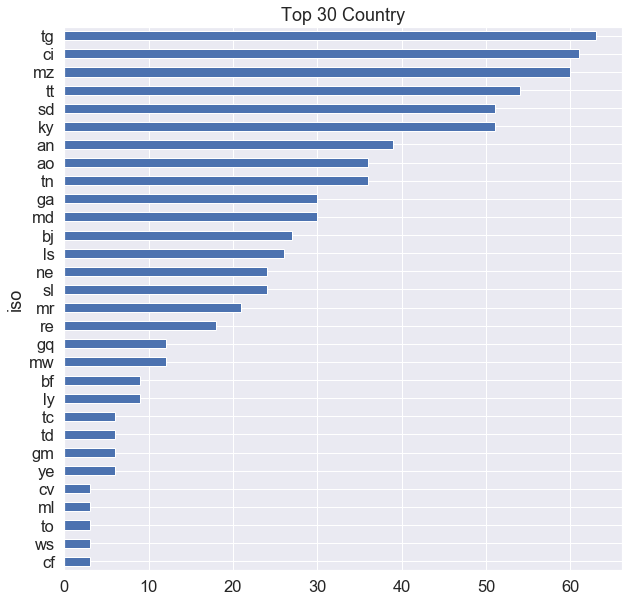

In [9]:
# 국가 별 데이터 분포

tmp = roam.groupby(by='iso', as_index=True)['count'].sum().sort_values().head(30)
tmp.plot(kind='barh', figsize=(10,10))
plt.title('Top 30 Country')

In [10]:
# 날짜 변수로 변경
roam['return'] = pd.to_datetime(roam['return'], format='%Y%m%d')

In [11]:
roam['arrival'] = pd.to_datetime(roam['arrival'], format='%Y%m%d')
roam['departure'] = pd.to_datetime(roam['departure'], format='%Y%m%d')

In [12]:
# 파생변수 생성
# arrival과 return의 차를 내서 해외에 체류한 일자수를 계산함

roam['stay'] = roam['return'] - roam['arrival']

In [14]:
roam['stay'] = roam['stay'].astype('timedelta64[D]')

In [16]:
roam.describe()

,count,stay
count,217805.000000,217805.000000
mean,9.054843,9.284971
std,31.457658,7.514431
min,3.000000,0.000000
25%,3.000000,4.000000
50%,3.000000,7.000000
75%,5.000000,12.000000
max,1687.000000,31.000000


In [17]:
roam[roam['count'] > 3]['count']

20       6
21       6
24      14
27      14
28      19
        ..
5473     4
5474     4
5476    20
5477     6
5478    45
Name: count, Length: 66611, dtype: int64

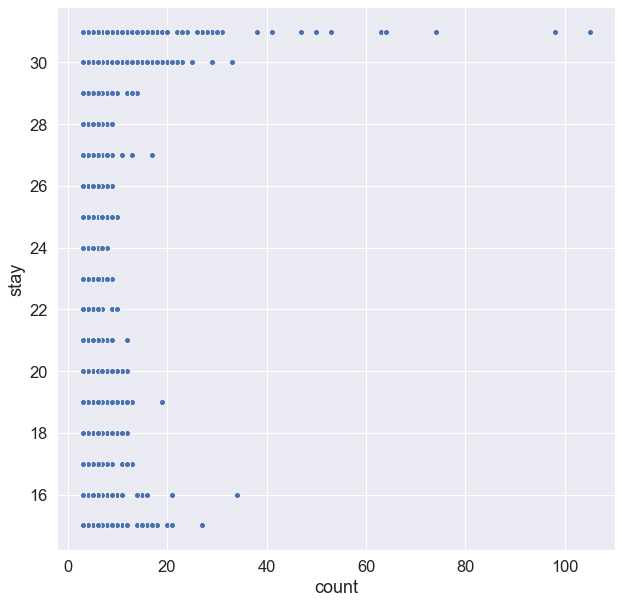

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=roam[roam['stay'] > 14], x='count', y='stay')

In [20]:
roam[roam['stay'] > 14]

,return,iso,arrival,departure,count,stay
1,2020-01-31,ae,2019-12-31,2020-01-25,3,31.0
2,2020-01-31,ae,2019-12-31,2020-01-31,3,31.0
3,2020-01-31,ae,2020-01-02,2020-01-02,3,29.0
4,2020-01-31,ae,2020-01-04,2020-01-31,3,27.0
5,2020-01-31,ae,2020-01-06,2020-01-06,3,25.0
...,...,...,...,...,...,...
5463,2020-04-01,vn,2020-03-07,2020-03-07,3,25.0
5464,2020-04-01,vn,2020-03-09,2020-03-09,3,23.0
5465,2020-04-01,vn,2020-03-11,2020-03-11,3,21.0
5466,2020-04-01,vn,2020-03-14,2020-03-14,3,18.0


In [57]:
roam_14 = roam[roam['stay'] > 13].pivot_table(index='return', values='count', aggfunc='sum')
roam_14.fillna(0, inplace=True)
roam_14.reset_index(inplace=True)
roam_14.rename(columns={'return':'Date'}, inplace=True)

In [59]:
ov = pd.read_csv('./data/oversea_inflow.csv')
ov = ov[1:-1]
new_ov = ov.iloc[:,:2]
new_ov.rename(columns={'date':"Date"}, inplace=True)
new_ov['Date'] = pd.to_datetime(new_ov['Date'])

In [61]:
df_14 = pd.merge(roam_14, new_ov, on='Date')

In [62]:
df_14['target'] = df_14['oversea_inflow'].diff()
df_14['target'].iloc[0] = 0
df_14.drop(['oversea_inflow'], axis=1, inplace=True)


C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [63]:
df_14.set_index('Date', inplace=True)

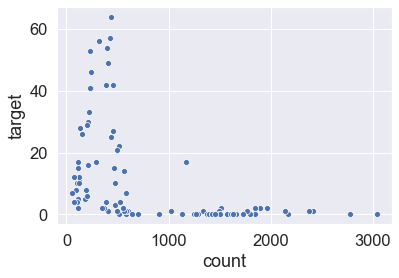

In [66]:
sns.scatterplot(data=df_14, x='count', y='target')

In [67]:
roam_7 = roam[roam['stay'] > 6].pivot_table(index='return', values='count', aggfunc='sum')
roam_7.fillna(0, inplace=True)
roam_7.reset_index(inplace=True)
roam_7.rename(columns={'return':'Date'}, inplace=True)
ov = pd.read_csv('./data/oversea_inflow.csv')
ov = ov[1:-1]
new_ov = ov.iloc[:,:2]
new_ov.rename(columns={'date':"Date"}, inplace=True)
new_ov['Date'] = pd.to_datetime(new_ov['Date'])
df_7 = pd.merge(roam_7, new_ov, on='Date')
df_7['target'] = df_7['oversea_inflow'].diff()
df_7['target'].iloc[0] = 0
df_7.drop(['oversea_inflow'], axis=1, inplace=True)
df_7.set_index('Date', inplace=True)

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


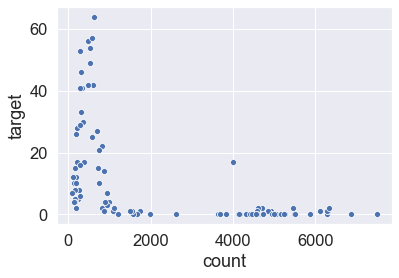

In [68]:
sns.scatterplot(data=df_7, x='count', y='target')

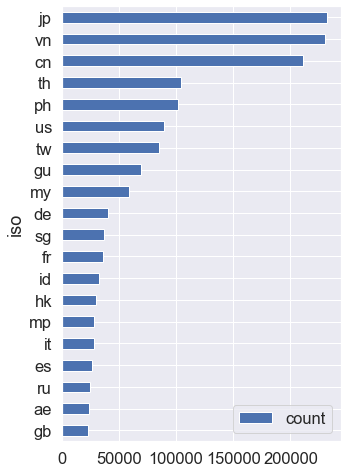

In [79]:
roam.groupby('iso', as_index=True)[['count']].sum().sort_values(by='count',ascending=True).tail(20).plot(kind='barh', figsize=(5,8))

- 로밍에 대한 데이터는 고객 아이디와 같은 Key Feature가 없기 때문에 로밍 인원수가 중복인지 아닌지 확인할 수가 없다.
- 따라서 로밍이 얼마나 이루어졌는지에 대한 빈도나 추세 등을 확인하는 방법으로 사용해야 될것으로 보인다.

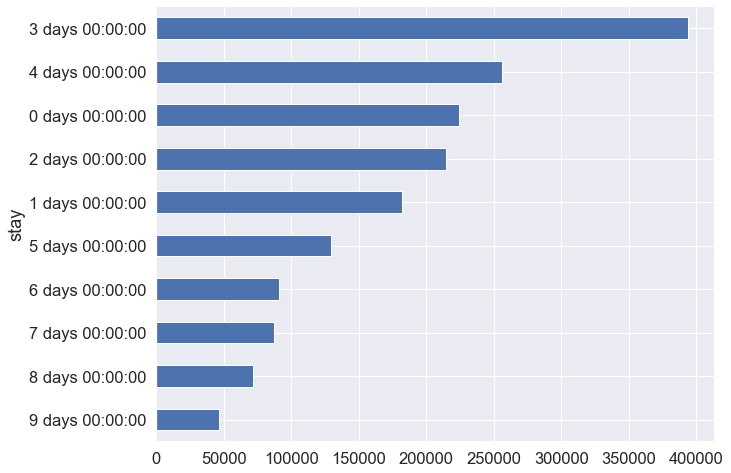

In [26]:
roam.groupby(by='stay')['count'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,8))

In [27]:
roam['count'].sum()

1947626

- 총 194만 건의 count 중, 3일 동안의 해외체류가 약 40만건으로 가장 많았고, 4일이 27만건, 0일 2일이 23만건 정도로 나타났다.

count                    212325
mean     9 days 06:51:46.758036
std      7 days 10:06:56.555469
min             0 days 00:00:00
25%             4 days 00:00:00
50%             7 days 00:00:00
75%            12 days 00:00:00
max            31 days 00:00:00
Name: stay, dtype: object


{'whiskers': [<matplotlib.lines.Line2D at 0x1f19bce3e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1998997b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f19bce3c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f199899eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f199899fd0>],
 'means': []}

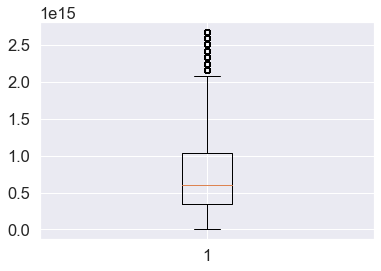

In [28]:
print(roam['stay'].describe().T)
plt.boxplot(roam['stay'])

- 최고 체류일자는 31일이다. 
- 대체로 출발부터 귀국까지 7일 정도 이용하는 것으로 보인다.

In [29]:
roam.head()

,return,iso,arrival,departure,count,stay
0,2020-01-31,ad,2020-01-30,2020-01-30,3,1 days
1,2020-01-31,ae,2019-12-31,2020-01-25,3,31 days
2,2020-01-31,ae,2019-12-31,2020-01-31,3,31 days
3,2020-01-31,ae,2020-01-02,2020-01-02,3,29 days
4,2020-01-31,ae,2020-01-04,2020-01-31,3,27 days


In [30]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '일별 로밍 고객 수')

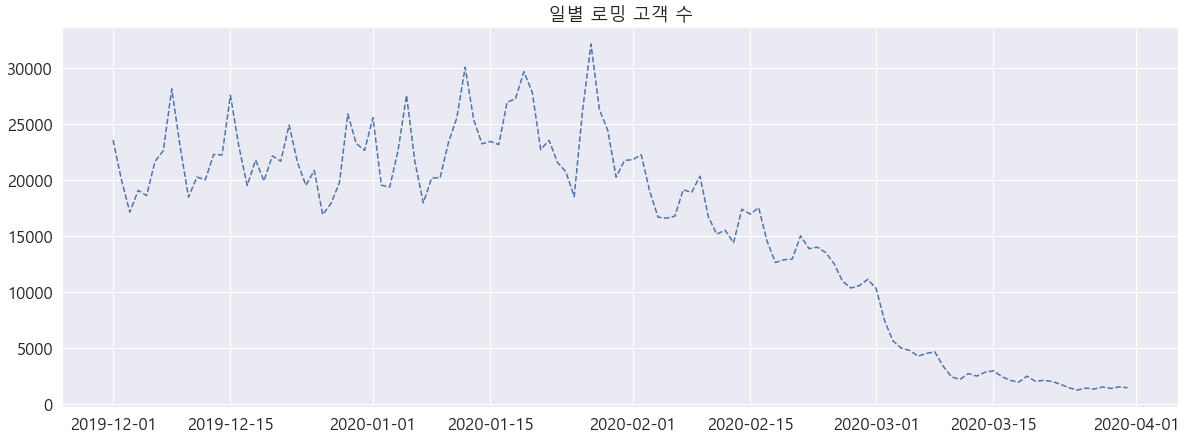

In [31]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].sum()
plt.figure(figsize=(20,7))
plt.plot(group_of_date['return'],group_of_date['count'],'--', label="value")
plt.title('일별 로밍 고객 수')

Text(0.5, 1.0, '일별 로밍 평균 고객 수')

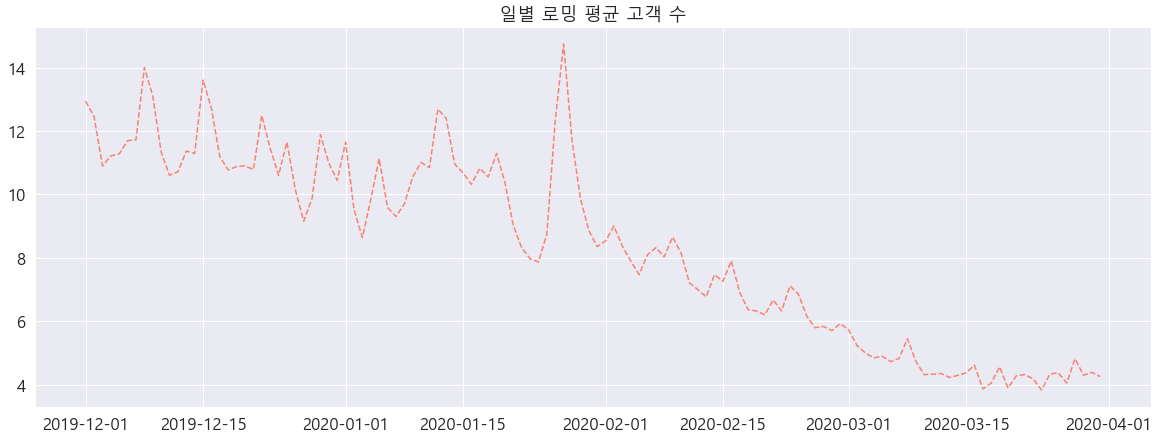

In [32]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].mean()
plt.figure(figsize=(20,7))
plt.plot(group_of_date['return'],group_of_date['count'],'--', label="value", color='salmon')
plt.title('일별 로밍 평균 고객 수')

- 일정한 주기를 띄는 것을 보아 주말에 arrival한 사람들이 많는 것으로 보인다.
- 코로나 감염이 크게 확산됐던 1월 말 경에는 로밍 숫자가 최고점을 찍고
- 이후 계속적으로 감소한다.

# 2. 캐글 데이터

In [4]:
kag = pd.read_csv('./data/kaggle/covid_19_clean_complete.csv')

In [5]:
kag['Date'] = pd.to_datetime(kag['Date'])

In [6]:
kag.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


Province/State    15470
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


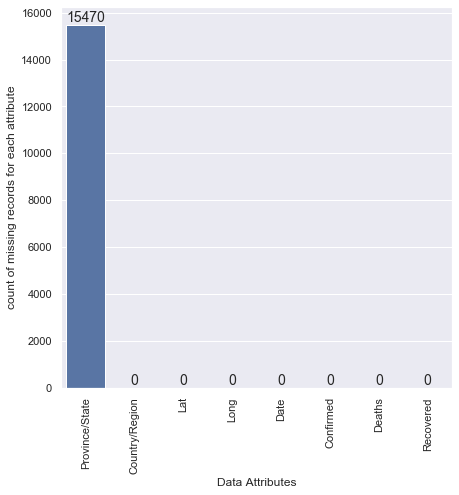

In [7]:
# 전체 결측치 확인
x = kag.columns
y = kag.isnull().sum()
print(y)
plt.figure(figsize=(7,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [26]:
# 위도 경도 값이 국가 위치인지 확인

kag.groupby(['Country/Region'])['Lat','Long'].mean()

,Lat,Long
Country/Region,,
Afghanistan,33.000000,65.000000
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
Antigua and Barbuda,17.060800,-61.796400
Argentina,-38.416100,-63.616700
Armenia,40.069100,45.038200
Australia,-31.996188,141.232788


# 이상치 검출

In [27]:
kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22270 entries, 0 to 22269
Data columns (total 8 columns):
Province/State    6800 non-null object
Country/Region    22270 non-null object
Lat               22270 non-null float64
Long              22270 non-null float64
Date              22270 non-null datetime64[ns]
Confirmed         22270 non-null int64
Deaths            22270 non-null int64
Recovered         22270 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [28]:
kag[['Confirmed','Deaths','Recovered']].head()

,Confirmed,Deaths,Recovered
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


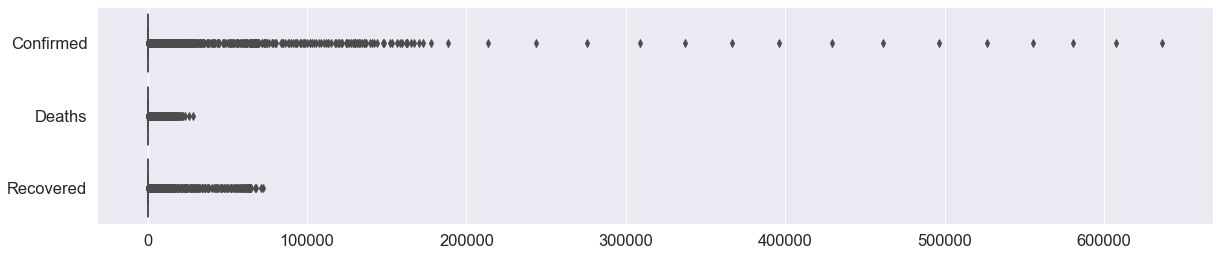

In [29]:
plt.figure(figsize=(20,4))
sns.boxplot(data=kag[['Confirmed','Deaths','Recovered']], orient='h')

- 이상치는 큰 의미가 없을 것으로 보인다. 
- 질병관리본부의 브리핑, 발표자료를 확인하면 초기에는 확진자수가 크게 많지 않았으나 대구 신천지교회와 같은 집단 확산으로 인해 급등한 이력이 있다.
- 따라서 이상치는 당연히 존재하는 것으로 생각하고 분석을 진행한다.

In [30]:
# 백분위수 기반 이상치 검출
# 백분위 수 범위가 2.5~97.5 사이인 모든 데이터를 사용하기 위해 Threshold를 95%로 설정하여 범위를 도출한다.

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold)/2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

In [31]:
# 중위수 절대 편차 기반 이상치 검출

def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in points]
    
    return np.abs(modified_z_scores) > threshold

In [32]:
# 표준편차 기반 이상점 검출
# 표준편차와 평균값을 이용해서 이상치을 찾는다.
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [33]:
# 다수결 투표 기반 이상치 검출
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    
    temp = list(zip(data.index, x, y, z))
    
    final = []
    for i in range(len(data.index)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [34]:
# 이상치 시각화

def plotOutlier(x):
    fig,axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers),'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.5, ha='left', va ='top', size = 20)
    axes[0].set_title("Percentitle-based Outliers", **kwargs)
    axes[1].set_title('MAD-based Outliers',**kwargs)
    axes[2].set_title('STD-based Outliers',**kwargs)
    axes[3].set_title('Majority vote based Outliers',**kwargs)
    fig.suptitle("Comparing Outlier Tests with n={}".format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

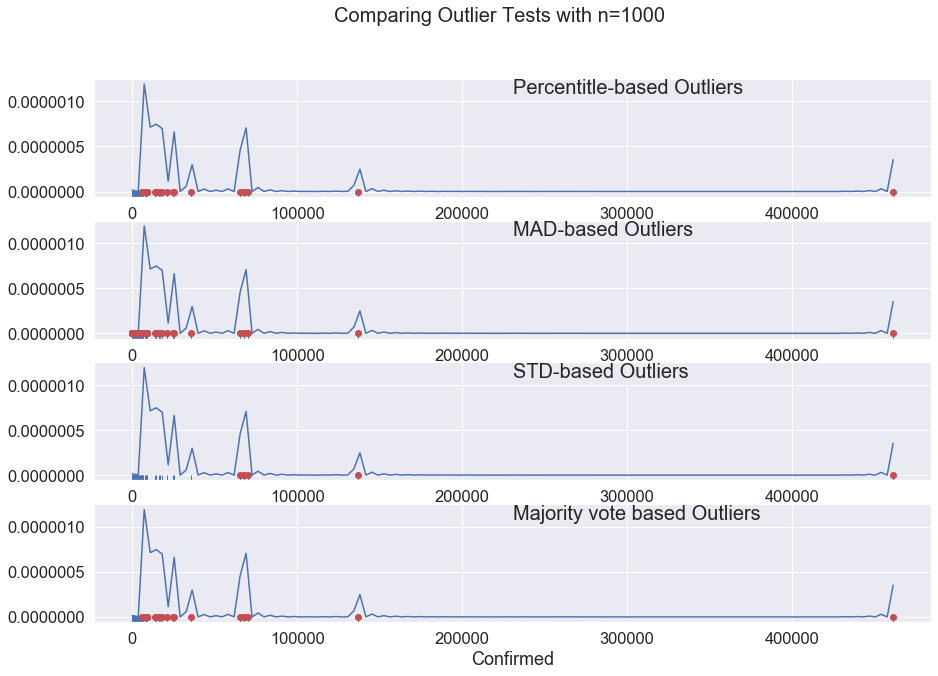

In [35]:
plotOutlier(kag.Confirmed.sample(1000))

In [36]:
kag_dated = kag.groupby(['Date'], as_index=False)['Confirmed'].sum()

In [39]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

count                     122
unique                    122
top       2020-03-13 00:00:00
freq                        1
first     2019-12-01 00:00:00
last      2020-03-31 00:00:00
Name: return, dtype: object
count                      85
unique                     85
top       2020-03-13 00:00:00
freq                        1
first     2020-01-22 00:00:00
last      2020-04-15 00:00:00
Name: Date, dtype: object


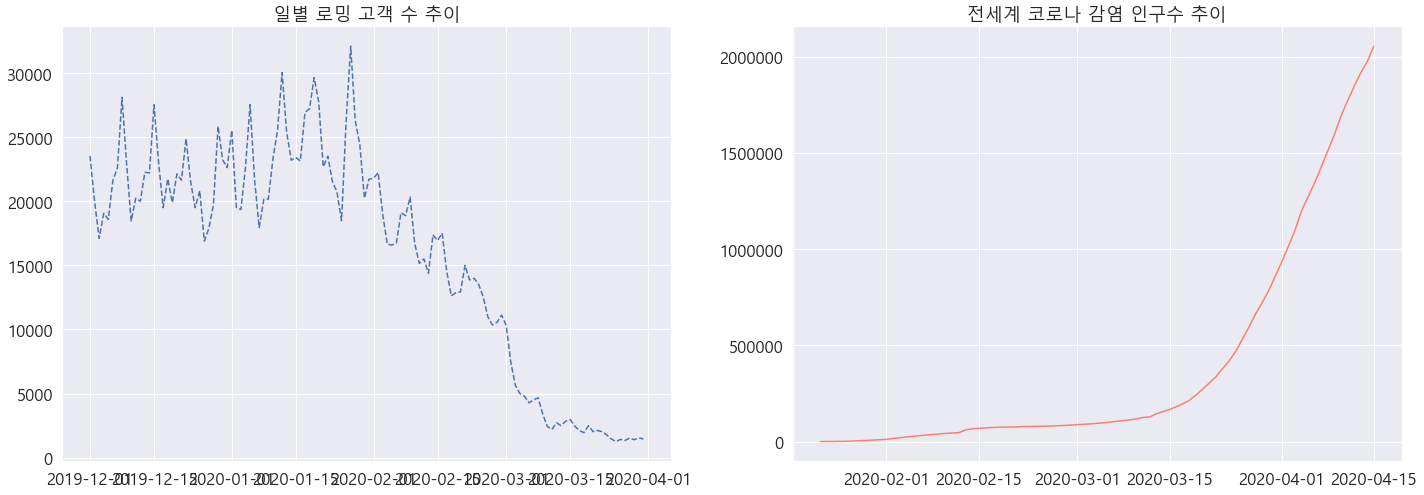

In [40]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].sum()
fig, ax = plt.subplots(nrows = 1, ncols = 2,
                      figsize = (24,8))
ax[0].plot(group_of_date['return'],group_of_date['count'],'--', label="count")
ax[0].set_title('일별 로밍 고객 수 추이')
ax[1].plot(kag_dated['Date'], kag_dated['Confirmed'], '-', label='Confirmed', color='salmon')
ax[1].set_title('전세계 코로나 감염 인구수 추이')
print(group_of_date['return'].describe())
print(kag_dated['Date'].describe())

1. 캐글 데이터에서 일별 한국 확진자 추출
2. 추출한 데이터와 로밍데이터 결합

In [41]:
kag.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [8]:
kag_1 = kag.drop('Province/State', axis=1)

# 국가별 일일 확진자 수

In [89]:
kag_2 = kag_1.pivot_table(index='Date',
                  columns='Country/Region',
                  values='Confirmed',
                         aggfunc='sum')

In [105]:
kag_3 = kag_1.pivot_table(index='Date',
                  columns='Country/Region',
                  values='Confirmed',
                         aggfunc='sum')

In [90]:
country_list = list(kag_2.columns)
country_list[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [92]:
for col in country_list:
    col_name = "Day"+str(col)
    kag_2['{}'.format(col_name)] = kag_2['{}'.format(col)].diff()
    kag_2['{}'.format(col_name)].iloc[0] = 0
#    kag_2.drop('{}'.format(col), axis=1, inplace=True)

In [106]:
for col in country_list:
    kag_3['{}'.format(col)] = kag_3['{}'.format(col)].diff()
    kag_3['{}'.format(col)].iloc[0] = 0

In [110]:
kag_3_cols = list(kag_3.columns)

In [113]:
kag_3_cols = list(map(lambda x: x.upper(), kag_3_cols))

In [115]:
country_dict.values()
c_list=[]
for col in kag_3_cols:
    for k, v in country_dict.items():
        if col == v:
            c_list.append(k)
        
print(len(c_list))

126


In [134]:
kag_3.to_csv("국가별_일일_확진자수.csv")

In [130]:
## 여기서 부터안됌

for col in kag_3_cols:
    for k, v in country_dict.items():
        if col == v:
            before = str(col)
            after = str(k)
            kag_3 = kag_3.rename(columns={before:after})

In [131]:
for i in kag_3.columns:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexic

In [94]:
kag_2[['Afghanistan','DayAfghanistan']]

Country/Region,Afghanistan,DayAfghanistan
Date,,
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
2020-01-27,0,0.0
2020-01-28,0,0.0
2020-01-29,0,0.0
2020-01-30,0,0.0


In [69]:
kag_1.groupby('Country/Region')

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0
5,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0
6,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0
7,Armenia,40.069100,45.038200,2020-01-22,0,0,0
8,Australia,-35.473500,149.012400,2020-01-22,0,0,0
9,Australia,-33.868800,151.209300,2020-01-22,0,0,0


In [38]:
country_dict = {
'GH' : 'GHANA',
'GA' : 'GABON',
'GY' : 'GUYANA',
'GM' : 'GAMBIA',
'GP' : 'GUADELOUPE',
'GT' : 'GUATEMALA',
'GU' : 'GUAM',
'GD' : 'GRENADA',
'GE' : 'GEORGIA',
'GR' : 'GREECE',
'GL' : 'GREENLAND',
'GW' : 'GUINEA-BISSAU',
'GN' : 'GUINEA',
'NA' : 'NAMIBIA',
'NG' : 'NIGERIA',
'ZA' : 'SOUTHAFRICA',
'NL' : 'NETHERLANDS',
'AN' : 'NETHERLANDS(ANTILLES)',
'NP' : 'NEPAL',
'NO' : 'NORWAY',
'NF' : 'NORFOLKISLAND',
'NZ' : 'NEWZEALAND',
'NC' : 'NEWCALEDONIA',
'NE' : 'NIGER',
'NI' : 'NICARAGUA',
'TW' : 'TAIWAN',
'DK' : 'DENMARK',
'DM' : 'DOMINICA',
'DO' : 'DOMINICANREPUBLIC',
'DE' : 'GERMANY',
'LA' : "LAOPEOPLE'SDEMREP",
'LV' : 'LATVIA',
'RU' : 'RUSSIANFEDERATION',
'LB' : 'LEBANON',
'LS' : 'LESOTHO',
'RO' : 'ROMANIA',
'RW' : 'RWANDA',
'LU' : 'LUXEMBORE',
'LR' : 'LIBERIA',
'LY' : 'LIBYANARABJAMAHIRIYA',
'RE' : 'REUNION',
'LT' : 'LITHUANIA',
'LI' : 'LIECHTENSTEIN',
'MG' : 'MADAGASCAR',
'MH' : 'MARSHALLISLANDS',
'FM' : 'MICRONESIA',
'MK' : 'MACEDONIA',
'MW' : 'MALAWI',
'MY' : 'MALAYSIA',
'ML' : 'MALI',
'MT' : 'MALTA',
'MQ' : 'MARTINIQUE',
'MX' : 'MEXICO',
'MC' : 'MONACO',
'MA' : 'MOROCCO',
'MU' : 'MAURITIUS',
'MR' : 'MAURITANIA',
'MZ' : 'MOZAMBIQUE',
'MS' : 'MONTSERRAT',
'MD' : 'MOLDOVA,REPUBLICOF',
'MV' : 'MALDIVES',
'MN' : 'MONGOLIA',
'US' : 'U.S.A',
'VI' : 'VIRGINISLANDSU.S.',
'AS' : 'AMERICANSAMOA',
'MM' : 'MYANMAR',
'VU' : 'VANUATU',
'BH' : 'BAHRAIN',
'BB' : 'BARBADOS',
'BS' : 'BAHAMAS',
'BD' : 'BANGLADESH',
'BY' : 'BELARUS',
'BM' : 'BERMUDA',
'VE' : 'VENEZUELA',
'BJ' : 'BENIN',
'VN' : 'VIETNAM',
'BE' : 'BELGIUM',
'BZ' : 'BELIZE',
'BA' : 'BosniaandHerzegovina',
'BW' : 'BOTSWANA',
'BO' : 'BOLIVIA',
'BF' : 'BURKINAFASO',
'BT' : 'BHUTAN',
'MP' : 'NORTHERNMARIANAISLANDS',
'BG' : 'BULGARIA(REP)',
'BR' : 'BRAZIL',
'BN' : 'BRUNEIDARUSSALAM',
'BI' : 'BURUNDI',
'WS' : 'SAMOA',
'SA' : 'SAUDIARABIA',
'CY' : 'CYPRUS',
'SM' : 'SANMARINO',
'SN' : 'SENEGAL',
'SC' : 'SEYCHELLES',
'LC' : 'SAINTLUCIA',
'VC' : 'SAINTVINCENTANDTHEGRENADINES',
'KN' : 'SAINTKITTSANDNEVIS',
'SB' : 'SOLOMONISLANDS',
'SR' : 'SURINAME',
'LK' : 'SRILANKA',
'SZ' : 'SWAZILAND',
'SE' : 'SWEDEN',
'CH' : 'SWITZERLAND',
'ES' : 'SPAIN',
'SK' : 'SLOVAKIA',
'SI' : 'SLOVENIA',
'SL' : 'SIERRALEONE',
'SG' : 'SINGAPORE',
'AE' : 'UNITEDARABEMIRATES',
'AW' : 'ARUBA',
'AM' : 'ARMENIA',
'AR' : 'ARGENTINA',
'IS' : 'ICELAND',
'HT' : 'HAITI',
'IE' : 'IRELAND',
'AZ' : 'AZERBAIJAN',
'AF' : 'AFGHANISTAN',
'AI' : 'ANGUILLA',
'AD' : 'ANDORRA',
'AG' : 'ANTIGUAANDBARBUDA',
'AL' : 'ALBANIA',
'DZ' : 'ALGERIA',
'AO' : 'ANGOLA',
'ER' : 'ERITREA',
'EE' : 'ESTONIA',
'EC' : 'ECUADOR',
'SV' : 'ELSALVADOR',
'GB' : 'UNITEDKINGDOM',
'VG' : 'VIRGINISLANDSBRITISH',
'YE' : 'YEMEN',
'OM' : 'OMAN',
'AU' : 'AUSTRALIA',
'AT' : 'AUSTRIA',
'HN' : 'HONDURAS',
'JO' : 'JORDAN',
'UG' : 'UGANDA',
'UY' : 'URUGUAY',
'UZ' : 'UZBEKISTAN',
'UA' : 'UKRAINE',
'ET' : 'ETHIOPIA',
'IQ' : 'IRAQ',
'IR' : 'IRAN(ISLAMICREP)',
'IL' : 'ISRAEL',
'EG' : 'EGYPT',
'IT' : 'ITALY',
'IN' : 'INDIA',
'ID' : 'INDONESIA',
'JP' : 'JAPAN',
'JM' : 'JAMAICA',
'ZM' : 'ZAMBIA',
'CN' : "CHINA(PEOPLE'SREP)",
'MO' : 'MACAO',
'HK' : 'CHINA(HONGKONG)',
'CF' : 'CENTRALAFRICANREPUBLIC',
'DJ' : 'DJIBOUTI',
'GI' : 'GIBRALTAR',
'ZW' : 'ZIMBABWE',
'TD' : 'CHAD',
'CZ' : 'CZECHREP',
'CS' : 'CZECHOSLOVAKIA',
'CL' : 'CHILE',
'CA' : 'CANADA',
'CM' : 'CAMEROON',
'CV' : 'CAPEVERDE',
'KY' : 'CAYMANISLANDS',
'KZ' : 'KAZAKHSTAN',
'QA' : 'QATAR',
'KH' : 'CAMBODIA',
'KE' : 'KENYA',
'CR' : 'COSTARICA',
'CI' : 'COTEDIVOIRE',
'CO' : 'COLOMBIA',
'CG' : 'CONGO',
'CU' : 'CUBA',
'KW' : 'KUWAIT',
'HR' : 'CROATIA',
'KG' : 'KYRGYZSTAN',
'KI' : 'KIRIBATI',
'TJ' : 'TAJIKISTAN',
'TZ' : 'TANZANIA(UNITEDREP)',
'TH' : 'THAILAND',
'TC' : 'TURKSANDCAICOSISLANDS',
'TR' : 'TURKEY',
'TG' : 'TOGO',
'TO' : 'TONGA',
'TV' : 'TUVALU',
'TN' : 'TUNISIA',
'TT' : 'TRINIDADANDTOBAGO',
'PA' : 'PANAMA(REP)',
'PY' : 'PARAGUAY',
'PK' : 'PAKISTAN',
'PG' : 'PAPUANEWGUINEA',
'PW' : 'PALAU',
'FO' : 'FAROEISLANDS',
'PE' : 'PERU',
'PT' : 'PORTUGAL',
'PL' : 'POLAND(REP)',
'PR' : 'PUERTORICO',
'FR' : 'FRANCE',
'GF' : 'FRENCHGUIANA',
'PF' : 'FRENCHPOLYNESIA',
'FJ' : 'FIJI',
'FI' : 'FINLAND',
'PH' : 'PHILIPPINES',
'HU' : 'HUNGARY(REP)'}

In [67]:
pivoted_roam = roam.pivot_table(index='return',
                columns='iso',
                values='count',
                aggfunc='sum')

In [68]:
roam_cols = list(pivoted_roam.columns)

In [69]:
roam_cols = list(map(lambda x: x.upper(), roam_cols))

In [70]:
for col in roam_cols:
    col_l = col.lower()
    
    for country in country_dict.keys():
        
        if col == country:
            print(col, col_l, country, country_dict[country])
            pivoted_roam.rename(columns={'col_l': "{}".format(country_dict[country])}, inplace=True)

AD ad AD ANDORRA
AE ae AE UNITEDARABEMIRATES
AF af AF AFGHANISTAN
AL al AL ALBANIA
AM am AM ARMENIA
AN an AN NETHERLANDS(ANTILLES)
AO ao AO ANGOLA
AR ar AR ARGENTINA
AT at AT AUSTRIA
AU au AU AUSTRALIA
AZ az AZ AZERBAIJAN
BA ba BA BosniaandHerzegovina
BD bd BD BANGLADESH
BE be BE BELGIUM
BF bf BF BURKINAFASO
BG bg BG BULGARIA(REP)
BH bh BH BAHRAIN
BJ bj BJ BENIN
BN bn BN BRUNEIDARUSSALAM
BO bo BO BOLIVIA
BR br BR BRAZIL
BT bt BT BHUTAN
BW bw BW BOTSWANA
BY by BY BELARUS
BZ bz BZ BELIZE
CA ca CA CANADA
CF cf CF CENTRALAFRICANREPUBLIC
CH ch CH SWITZERLAND
CI ci CI COTEDIVOIRE
CL cl CL CHILE
CM cm CM CAMEROON
CN cn CN CHINA(PEOPLE'SREP)
CO co CO COLOMBIA
CR cr CR COSTARICA
CV cv CV CAPEVERDE
CY cy CY CYPRUS
CZ cz CZ CZECHREP
DE de DE GERMANY
DK dk DK DENMARK
DO do DO DOMINICANREPUBLIC
DZ dz DZ ALGERIA
EC ec EC ECUADOR
EE ee EE ESTONIA
EG eg EG EGYPT
ES es ES SPAIN
ET et ET ETHIOPIA
FI fi FI FINLAND
FJ fj FJ FIJI
FR fr FR FRANCE
GA ga GA GABON
GB gb GB UNITEDKINGDOM
GE ge GE GEORGIA
GH gh 

In [136]:
pivoted_roam.to_csv("국가별_일일_로밍수.csv")

In [64]:
pivoted_roam.columns[40:50]

Index(['do', 'dz', 'ec', 'ee', 'eg', 'es', 'et', 'fi', 'fj', 'fr'], dtype='object', name='iso')

In [39]:
country_dict.

{'GH': 'GHANA',
 'GA': 'GABON',
 'GY': 'GUYANA',
 'GM': 'GAMBIA',
 'GP': 'GUADELOUPE',
 'GT': 'GUATEMALA',
 'GU': 'GUAM',
 'GD': 'GRENADA',
 'GE': 'GEORGIA',
 'GR': 'GREECE',
 'GL': 'GREENLAND',
 'GW': 'GUINEA-BISSAU',
 'GN': 'GUINEA',
 'NA': 'NAMIBIA',
 'NG': 'NIGERIA',
 'ZA': 'SOUTHAFRICA',
 'NL': 'NETHERLANDS',
 'AN': 'NETHERLANDS(ANTILLES)',
 'NP': 'NEPAL',
 'NO': 'NORWAY',
 'NF': 'NORFOLKISLAND',
 'NZ': 'NEWZEALAND',
 'NC': 'NEWCALEDONIA',
 'NE': 'NIGER',
 'NI': 'NICARAGUA',
 'TW': 'TAIWAN',
 'DK': 'DENMARK',
 'DM': 'DOMINICA',
 'DO': 'DOMINICANREPUBLIC',
 'DE': 'GERMANY',
 'LA': "LAOPEOPLE'SDEMREP",
 'LV': 'LATVIA',
 'RU': 'RUSSIANFEDERATION',
 'LB': 'LEBANON',
 'LS': 'LESOTHO',
 'RO': 'ROMANIA',
 'RW': 'RWANDA',
 'LU': 'LUXEMBORE',
 'LR': 'LIBERIA',
 'LY': 'LIBYANARABJAMAHIRIYA',
 'RE': 'REUNION',
 'LT': 'LITHUANIA',
 'LI': 'LIECHTENSTEIN',
 'MG': 'MADAGASCAR',
 'MH': 'MARSHALLISLANDS',
 'FM': 'MICRONESIA',
 'MK': 'MACEDONIA',
 'MW': 'MALAWI',
 'MY': 'MALAYSIA',
 'ML': 'MALI',
 

In [46]:
for k,v in country_dict.items():
    print(k)

GH
GA
GY
GM
GP
GT
GU
GD
GE
GR
GL
GW
GN
NA
NG
ZA
NL
AN
NP
NO
NF
NZ
NC
NE
NI
TW
DK
DM
DO
DE
LA
LV
RU
LB
LS
RO
RW
LU
LR
LY
RE
LT
LI
MG
MH
FM
MK
MW
MY
ML
MT
MQ
MX
MC
MA
MU
MR
MZ
MS
MD
MV
MN
US
VI
AS
MM
VU
BH
BB
BS
BD
BY
BM
VE
BJ
VN
BE
BZ
BA
BW
BO
BF
BT
MP
BG
BR
BN
BI
WS
SA
CY
SM
SN
SC
LC
VC
KN
SB
SR
LK
SZ
SE
CH
ES
SK
SI
SL
SG
AE
AW
AM
AR
IS
HT
IE
AZ
AF
AI
AD
AG
AL
DZ
AO
ER
EE
EC
SV
GB
VG
YE
OM
AU
AT
HN
JO
UG
UY
UZ
UA
ET
IQ
IR
IL
EG
IT
IN
ID
JP
JM
ZM
CN
MO
HK
CF
DJ
GI
ZW
TD
CZ
CS
CL
CA
CM
CV
KY
KZ
QA
KH
KE
CR
CI
CO
CG
CU
KW
HR
KG
KI
TJ
TZ
TH
TC
TR
TG
TO
TV
TN
TT
PA
PY
PK
PG
PW
FO
PE
PT
PL
PR
FR
GF
PF
FJ
FI
PH
HU


In [59]:
roam['return'].describe()

count                  212325
unique                    122
top       2020-01-22 00:00:00
freq                     2828
first     2019-12-01 00:00:00
last      2020-03-31 00:00:00
Name: return, dtype: object

In [73]:
# 한국데이터 추출
kag_kor = kag.loc[kag['Country/Region']=='South Korea']

In [74]:
kag_kor.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
21103,NaN,South Korea,36.0,128.0,2020-04-11,10480,211,7243
21365,NaN,South Korea,36.0,128.0,2020-04-12,10512,214,7368
21627,NaN,South Korea,36.0,128.0,2020-04-13,10537,217,7447
21889,NaN,South Korea,36.0,128.0,2020-04-14,10564,222,7534
22151,NaN,South Korea,36.0,128.0,2020-04-15,10591,225,7616


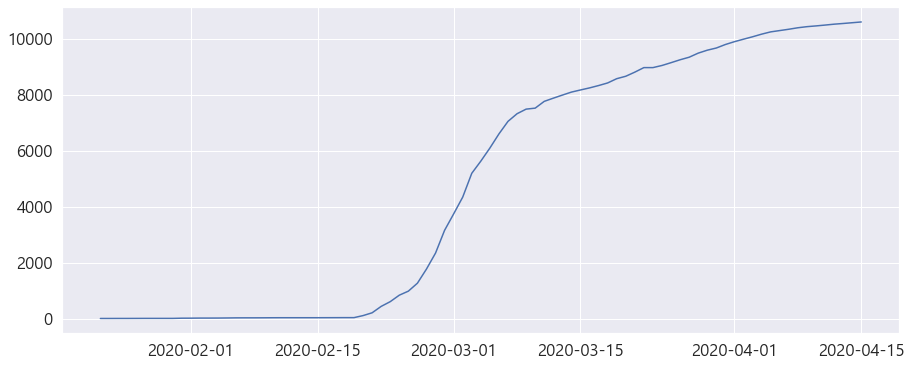

In [75]:
plt.figure(figsize=(15,6))
plt.plot(kag_kor.Date, kag_kor.Confirmed)

In [76]:
kor = kag_kor.copy()

In [77]:
kor.reset_index(inplace=True)
kor.drop('index', axis=1, inplace=True)

In [78]:
kor.drop('Province/State', axis=1, inplace=True)

In [79]:
# 대한민국 일별 확진자수 컬럼 형성
kor['Confirmed_1'] = np.nan
kor['Confirmed_1'][1:] = kor['Confirmed'][0:-1]
kor['Confirmed_1'].iloc[0] = 0
kor['Confirmed_1'] = kor['Confirmed_1'].astype('int64')
kor['day_confirmed'] = kor['Confirmed'] - kor['Confirmed_1']
kor.drop('Confirmed_1',axis=1, inplace=True)
kor.head()

C:\Users\Joshua\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,day_confirmed
0,South Korea,36.0,128.0,2020-01-22,1,0,0,1
1,South Korea,36.0,128.0,2020-01-23,1,0,0,0
2,South Korea,36.0,128.0,2020-01-24,2,0,0,1
3,South Korea,36.0,128.0,2020-01-25,2,0,0,0
4,South Korea,36.0,128.0,2020-01-26,3,0,0,1


In [80]:
kor['Date'][kor['day_confirmed']==max(kor['day_confirmed'])]

41   2020-03-03
Name: Date, dtype: datetime64[ns]

41   2020-03-03
Name: Date, dtype: datetime64[ns]


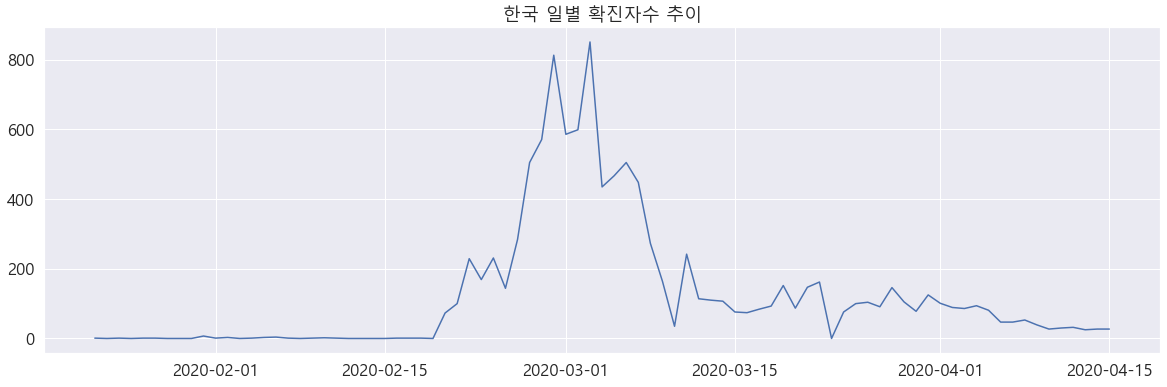

In [81]:
plt.figure(figsize=(20,6))
plt.plot(kor['Date'], kor['day_confirmed'])
plt.title("한국 일별 확진자수 추이")
max_day = kor['Date'][kor['day_confirmed']==max(kor['day_confirmed'])]
print(max_day)

# 3. 데이터셋 병합
- 데이터 셋 병합은 3가지 데이터를 병합한다.
- 로밍 데이터, 캐글 글로벌 확진자수, 한국의 확진자 데이터이다.
- 우선 한국의 감염자 수를 Target Feature로 놓고 분석을 진행한다.
- 후에 해외유입에 대한 데이터가 확보 되면 모델을 발전시킨다.

In [51]:
roam.head()

,return,iso,arrival,departure,count,stay
0,2020-01-31,ad,2020-01-30,2020-01-30,3,1 days
1,2020-01-31,ae,2019-12-31,2020-01-25,3,31 days
2,2020-01-31,ae,2019-12-31,2020-01-31,3,31 days
3,2020-01-31,ae,2020-01-02,2020-01-02,3,29 days
4,2020-01-31,ae,2020-01-04,2020-01-31,3,27 days


In [52]:
kag.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [53]:
kag_dated_1 = kag.groupby(['Date'], as_index=False)['Confirmed','Deaths', 'Recovered'].sum()

In [54]:
kag_dated_1.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [55]:
cols = list(kag_dated_1.columns[1:])
for col in cols:
    col_name = str(col)+'_1'
    kag_dated_1['{0}'.format(col_name)] = np.nan
    kag_dated_1['{0}'.format(col_name)][1:] = kag_dated_1['{0}'.format(col)][0:-1]
    kag_dated_1['{0}'.format(col_name)].iloc[0] = 0
    kag_dated_1['{0}'.format(col_name)] = kag_dated_1['{0}'.format(col_name)][1:].astype('int64')
    new_col_name = 'day'+str(col)
    kag_dated_1['{}'.format(new_col_name)] = kag_dated_1['{}'.format(col)] - kag_dated_1['{}'.format(col_name)]
    #kag_dated_1("{}".format(col_name), axis=1, inplace=True)

C:\Users\Joshua\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [56]:
kag_dated_1.head()

,Date,Confirmed,Deaths,Recovered,Confirmed_1,dayConfirmed,Deaths_1,dayDeaths,Recovered_1,dayRecovered
0,2020-01-22,555,17,28,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,654,18,30,555.0,99.0,17.0,1.0,28.0,2.0
2,2020-01-24,941,26,36,654.0,287.0,18.0,8.0,30.0,6.0
3,2020-01-25,1434,42,39,941.0,493.0,26.0,16.0,36.0,3.0
4,2020-01-26,2118,56,52,1434.0,684.0,42.0,14.0,39.0,13.0


In [57]:
kag_dated_1.drop(['Confirmed_1','Deaths_1','Recovered_1'], axis=1, inplace=True)

In [59]:
kag_dated_1.loc[0,['dayConfirmed', 'dayDeaths', 'dayRecovered']] = 0

In [65]:
kag_dated_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,85.0,391233.847059,569896.076507,555.0,46729.0,95120.0,467653.0,2056051.0
Deaths,85.0,20841.658824,34842.117865,17.0,1118.0,3254.0,21181.0,134177.0
Recovered,85.0,94593.964706,124204.614965,28.0,5149.0,51164.0,113604.0,502045.0
dayConfirmed,85.0,24182.305882,31686.561367,0.0,1937.0,3915.0,49608.0,101491.0
dayDeaths,85.0,1578.352941,2361.810301,0.0,70.0,143.0,2556.0,8193.0
dayRecovered,85.0,5906.082353,8242.909382,0.0,628.0,2373.0,8290.0,36002.0


In [82]:
new_kor = kor.drop(['Country/Region','Lat','Long','Deaths','Recovered'], axis=1)

In [86]:
new_kor.head()

,Date,Confirmed,day_confirmed
0,2020-01-22,1,1
1,2020-01-23,1,0
2,2020-01-24,2,1
3,2020-01-25,2,0
4,2020-01-26,3,1


In [98]:
new_roam = group_of_date.copy()

In [99]:
new_roam.rename(columns = {'return' : 'Date'}, inplace=True)

In [100]:
new_roam.head()

,Date,count
0,2019-12-01,23551
1,2019-12-02,20008
2,2019-12-03,17116
3,2019-12-04,19067
4,2019-12-05,18594


In [101]:
df = pd.merge(new_roam, kag_dated_1, on='Date')

In [103]:
df = pd.merge(df, new_kor, on='Date')

In [105]:
# 변수명 정리

df.rename(columns = {'count' : 'roam',
                     'Confirmed_x':'g_confirmed',
                     'Deaths':'g_deaths',
                     'Recovered':'g_recovered',
                     'dayConfirmed':'g_dayconfirmed',
                     'dayDeaths':'g_daydeaths',
                     'dayRecovered':'g_dayrecovered',
                     'Confirmed_y':'k_confirmed',
                     'day_confirmed':'k_dayconfirmed'}, inplace=True)

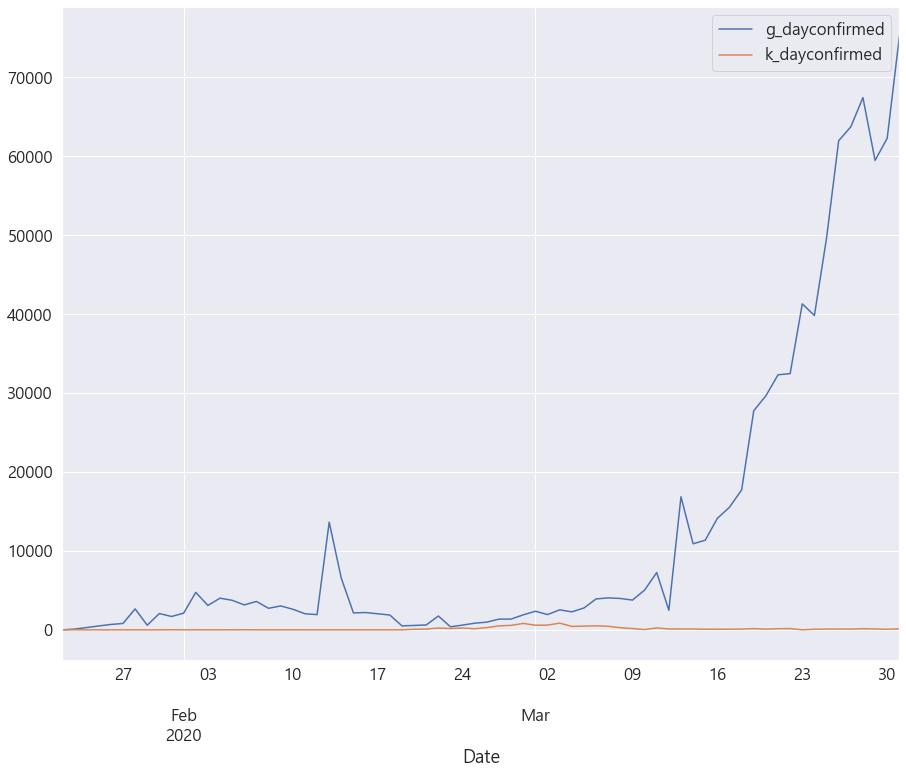

In [181]:
df.plot(kind='line', x='Date', y=['g_dayconfirmed','k_dayconfirmed'],
                                            figsize=(15,12),
                                            legend=True,
                                            grid=True)

In [182]:
# 데이터 프레임 저장
df.to_csv('./data/total.csv')

In [183]:
df.head()

,Date,roam,g_confirmed,g_deaths,g_recovered,g_dayconfirmed,g_daydeaths,g_dayrecovered,k_confirmed,k_dayconfirmed
0,2020-01-22,23527,555,17,28,0.0,0.0,0.0,1,1
1,2020-01-23,21559,654,18,30,99.0,1.0,2.0,1,0
2,2020-01-24,20726,941,26,36,287.0,8.0,6.0,2,1
3,2020-01-25,18496,1434,42,39,493.0,16.0,3.0,2,0
4,2020-01-26,26214,2118,56,52,684.0,14.0,13.0,3,1


# 4. 감염병데이터

|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
|파일명|파일명|파일리스트의 파일명과 일치|AFRO2019120200003|
|제목|제목|기사의 제목|WHO supports Angola’s Government efforts to end polio outbreak|
|URL|원문기사링크|해당 기사의 원문 링크|https://www.afro.who.int/news/who-supports-angolas-government-efforts-end-polio-outbreak
|수집일자|수집일자|KT 크롤링 시스템에 의해 기사가 수집된 날짜|2019-12-02 21:00:16.0|
|게시일자|게시일자|원문 Site에 해당 기사가 게시된 날짜|2019-12-02 00:00:00|
|채널명|채널명|기사가 게시된 Site의 이름|AFRO|
|감염병명|감염병명|기사에 표기된 감염병의 이름|Poliomyelitis|
|분류명|분류명|감염병의 분류(카테고리) 명|Viral|


In [48]:
news = pd.read_excel('./data/corona_contest_data_0406/3-1. NewsList.xls', sheet_name="List")

In [49]:
news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


In [50]:
# 전체 기사 중 병명에 따른 누적 갯수
cum_viral = news.groupby('분류명', as_index=False)[['파일명']].count().sort_values(by='파일명')
cum_viral

,분류명,파일명
3,Parasitic (Arthropods),19
6,Parasitic (Trematodes),26
7,Parasitic (nematodes),40
4,Parasitic (Cestodes),52
2,Parasitic,53
8,Prion,65
9,Rickettsial,104
1,Fungal,110
5,Parasitic (Protozoans),845
0,Bacterial,3138


<BarContainer object of 3 artists>

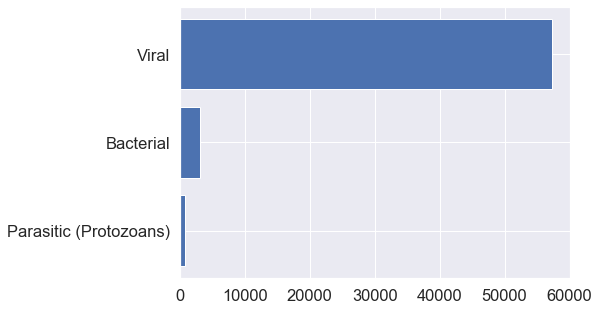

In [51]:
# 상위 3개 중 viral의 비중이 압도적이다.
plt.figure(figsize=(7,5))
plt.barh('분류명', '파일명',data=cum_viral.tail(3))

In [52]:
total_length = len(news['분류명'])
viral_length = len(news[news['분류명'] == 'Viral'])

per_of_viral = round(viral_length / total_length * 100, 2)
per_of_viral

92.79

- viral의 비중의 92.79%이기 때문에 다른 데이터들은 삭제해도 무관할 것으로 보인다.

In [53]:
# viral만 가지고 있는 데이터 셋 생성

viral_news = news[news['분류명'] == 'Viral']
viral_news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


- viral에 관한 뉴스기사 중 61%가 코로나 바이러스에 대한 뉴스기사이다.

In [54]:
# 감염병명에 따른 분포
tmp = viral_news.groupby(by='감염병명', as_index=False)[['파일명']].count().sort_values(by='파일명', ascending=True)
tmp.head()

,감염병명,파일명
47,Nipha virus infection,1
15,Contagious ecthyma,1
77,Viral hepatitis A,1
38,Lymphocytic choriomeningitis,1
76,Viral hemorrhagic fever,1


In [55]:
tmp.sort_values('파일명', ascending=False).head()

,감염병명,파일명
9,COVID-19,35238
33,Influenza,6760
18,Dengue fever,3945
40,Measles,1587
63,Severe acute respiratory syndrome,1574


In [56]:
total_ = tmp.파일명.sum()
covid_ = tmp.iloc[84,1]
per_of_covid = round(covid_/total_*100,2)
per_of_covid

61.53

In [57]:
df_count.sort_values()

NameError: name 'df_count' is not defined

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
df_count = viral_news.groupby(by='감염병명', as_index=False)[['파일명']].size().sort_values()
df_count.plot.pie(autopct = "%.1f%%", startangle=90, shadow=True, textprops={'fontsize': 10}, ax=ax[0])
ax[0].set_title('viral 기사 중 질병 별 비율')
ax[1].barh('감염병명', '파일명',data=tmp.tail(5), color=['salmon', 'cornflowerblue'])
ax[1].set_title('viral 기사 중 질병 별 상위 5개 누적도수분포')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

In [ ]:
viral_news.head()

In [ ]:
viral_news['채널명'].unique()

In [ ]:
viral_news['수집일자'][0][:10]

In [ ]:
viral_news['date'] = viral_news['수집일자'].apply(lambda x: x[:10])
viral_news['date'] = pd.to_datetime(viral_news['date'], format='%Y-%m-%d')

In [ ]:
viral_news['date'].describe()

In [ ]:
# 총 122일 동안의 기사들이다.
max(viral_news['date']) - min(viral_news['date'])